In [1]:
# To remove useless future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Se carga el archivo y se separa en entrenamiento y prueba

In [2]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('datasets/dataTuberculosis.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

1455 1164 291


In [3]:
train_data.shape

(1164, 15)

In [4]:
train_data.head()

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COOMORBILIDAD,MALNUTRICION,Contactos,ContactosSR,ContactosSRExaminadosconBK,ContactosMenores5Anios,VIHCONFIRMADO,RECIBETAR,RECIBETRIMETOPRIN,RDOBKDX,RDOSALIDA
720,0,39.0,2,4,5,0,0,0,0,0,2,2,2,4,1
254,1,24.0,2,3,5,0,0,0,0,0,2,2,2,4,0
1063,0,31.0,2,4,5,0,1,0,1,0,2,2,2,5,1
636,1,25.0,2,3,5,0,3,3,3,0,2,2,2,4,1
1289,1,23.0,2,3,5,0,5,5,5,0,2,2,2,3,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 720 to 1126
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEXO                        1164 non-null   int64  
 1   EDAD                        1164 non-null   float64
 2   ETNIA                       1164 non-null   int64  
 3   GRUPOPOBLACIONAL            1164 non-null   int64  
 4   COOMORBILIDAD               1164 non-null   int64  
 5   MALNUTRICION                1164 non-null   int64  
 6   Contactos                   1164 non-null   int64  
 7   ContactosSR                 1164 non-null   int64  
 8   ContactosSRExaminadosconBK  1164 non-null   int64  
 9   ContactosMenores5Anios      1164 non-null   int64  
 10  VIHCONFIRMADO               1164 non-null   int64  
 11  RECIBETAR                   1164 non-null   int64  
 12  RECIBETRIMETOPRIN           1164 non-null   int64  
 13  RDOBKDX                     116

In [6]:
train_data[["SEXO", "EDAD", "ETNIA", "GRUPOPOBLACIONAL","COOMORBILIDAD","MALNUTRICION","Contactos"]].describe()

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COOMORBILIDAD,MALNUTRICION,Contactos
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,0.679553,40.683276,1.862543,3.524914,4.636598,0.048969,2.853952
std,0.466849,20.162759,0.354321,0.799977,1.001839,0.215896,5.827941
min,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,2.000000,3.000000,5.000000,0.000000,0.000000
50%,1.000000,34.500000,2.000000,4.000000,5.000000,0.000000,2.000000
75%,1.000000,56.250000,2.000000,4.000000,5.000000,0.000000,4.000000
max,1.000000,95.000000,2.000000,4.000000,5.000000,1.000000,111.000000


### Pipeline para los atributos numéricos

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_attribs = ["SEXO", "EDAD", "ETNIA", "GRUPOPOBLACIONAL","COOMORBILIDAD","MALNUTRICION","Contactos","ContactosSR","ContactosSRExaminadosconBK","ContactosMenores5Anios","VIHCONFIRMADO","RECIBETAR","RECIBETRIMETOPRIN","RDOBKDX"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])
#MinMaxScaler() escala entre 0 y 1, pero dio peores resultados con svm

### Pipeline completo

In [7]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

### Extraemos las etiquetas de clase

In [8]:
y_train = train_data["RDOSALIDA"]
y_train

720     1
254     0
1063    1
636     1
1289    1
       ..
1095    1
1130    1
1294    1
860     1
1126    1
Name: RDOSALIDA, Length: 1164, dtype: int64

In [9]:
X_train = full_pipeline.fit_transform(train_data)

In [10]:
X_train.shape

(1164, 14)

In [11]:
X_train

array([[-1.45624292, -0.08352029,  0.3881118 , ...,  0.26101838,
         0.25791484,  0.143783  ],
       [ 0.68669862, -0.82778586,  0.3881118 , ...,  0.26101838,
         0.25791484,  0.143783  ],
       [-1.45624292, -0.48046193,  0.3881118 , ...,  0.26101838,
         0.25791484,  1.05336677],
       ...,
       [ 0.68669862, -0.28199111,  0.3881118 , ...,  0.26101838,
         0.25791484, -0.76580077],
       [ 0.68669862, -0.1827557 ,  0.3881118 , ...,  0.26101838,
         0.25791484,  0.143783  ],
       [ 0.68669862,  1.80195247,  0.3881118 , ...,  0.26101838,
         0.25791484,  1.05336677]])

In [12]:
X_train[0,:]

array([-1.45624292, -0.08352029,  0.3881118 ,  0.59412961,  0.36289099,
       -0.22691522, -0.48991208, -0.23756845, -0.22765585, -0.27213144,
        0.2966717 ,  0.26101838,  0.25791484,  0.143783  ])

In [13]:
X_train[:,0]

array([-1.45624292,  0.68669862, -1.45624292, ...,  0.68669862,
        0.68669862,  0.68669862])

# Entrenamiento del modelo con RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=300, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

### Utilizar validación cruzada con k=10

![Archivo no encontrado](kfold.png)

In [15]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.6564470969643383

# Entrenamiento del modelo con SVM

In [16]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto",random_state=42, kernel="linear")
#"rbf", "linear", "polynomial", "sigmoid", 
#svm_clf = SVR(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.6993073975832595

# Entrenamiento con redes neuronales

In [17]:
from sklearn.neural_network import MLPClassifier
NN_clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(4,3), random_state=1)
NN_clf.fit(X_train, y_train)
NN_scores = cross_val_score(NN_clf, X_train, y_train, cv=10)
NN_scores.mean()

0.6975758915414088

Graficar los resultados

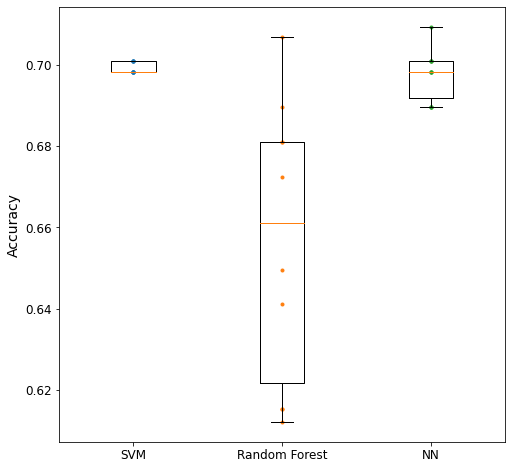

In [18]:
plt.figure(figsize=(8, 8))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, NN_scores, ".")
plt.boxplot([svm_scores, forest_scores,NN_scores], labels=("SVM","Random Forest","NN"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Analicemos el desempeño en el conjunto de prueba

In [19]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 0.68669862,  1.10730461,  0.3881118 , ...,  0.26101838,
         0.25791484, -1.67538453],
       [ 0.68669862, -0.97663897,  0.3881118 , ...,  0.26101838,
         0.25791484, -0.76580077],
       [-1.45624292,  1.35539313,  0.3881118 , ...,  0.26101838,
         0.25791484, -0.76580077],
       ...,
       [-1.45624292, -0.67893274,  0.3881118 , ...,  0.26101838,
         0.25791484,  0.143783  ],
       [ 0.68669862, -0.48046193,  0.3881118 , ...,  0.26101838,
         0.25791484, -0.76580077],
       [-1.45624292, -0.38122652,  0.3881118 , ...,  0.26101838,
         0.25791484,  0.143783  ]])

In [20]:
#y_pred = svm_clf.predict(X_test)  #predecir con SVM
y_pred = forest_clf.predict(X_test) #predecir con RF
#y_pred = NN_clf.predict(X_test) #predecir con NN
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [21]:
y_test = test_data["RDOSALIDA"]

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6494845360824743

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 18,  74],
       [ 28, 171]])

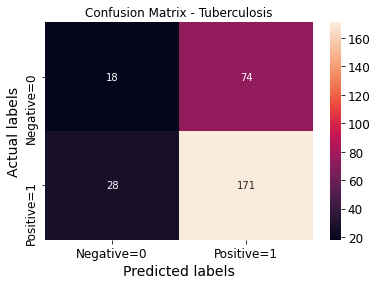

In [24]:
%matplotlib inline

ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Tuberculosis') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();